In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('Google_Stock_Price_Train.csv')

In [9]:
train.shape

(1258, 1)

In [7]:
train=train.iloc[:,1:2].values

In [44]:
train1=pd.read_csv('Google_Stock_Price_Train.csv')
train1=train1.iloc[:,1:2].values


In [23]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
train=sc.fit_transform(train)

In [39]:
X_train=train[0:1257]

In [40]:
y_train=train[1:1258]

In [26]:
import numpy as np
X_train=np.reshape(X_train,(1257,1,1))

In [27]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential

In [28]:
regressor=Sequential()

# Input Layer

In [29]:
regressor.add(LSTM(units=4, activation='sigmoid',input_shape=(None,1)))

# Output Layer

In [30]:
regressor.add(Dense(units=1))

In [31]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [32]:
regressor.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 1s 786us/step - loss: 0.1446
Epoch 2/200
1257/1257 [==============================] - 0s 45us/step - loss: 0.1061
Epoch 3/200
1257/1257 [==============================] - 0s 46us/step - loss: 0.0862
Epoch 4/200
1257/1257 [==============================] - 0s 44us/step - loss: 0.0773
Epoch 5/200
1257/1257 [==============================] - 0s 44us/step - loss: 0.0739
Epoch 6/200
1257/1257 [==============================] - 0s 45us/step - loss: 0.0722
Epoch 7/200
1257/1257 [==============================] - 0s 44us/step - loss: 0.0712
Epoch 8/200
1257/1257 [==============================] - 0s 45us/step - loss: 0.0702
Epoch 9/200
1257/1257 [==============================] - 0s 40us/step - loss: 0.0693
Epoch 10/200
1257/1257 [==============================] - 0s 45us/step - loss: 0.0682
Epoch 11/200
1257/1257 [==============================] - 0s 36us/step - loss: 0.0672
Epoch 12/200
1257/1257 [==============================] - 0s 3

1257/1257 [==============================] - 0s 35us/step - loss: 2.5049e-04
Epoch 185/200
1257/1257 [==============================] - 0s 36us/step - loss: 2.5069e-04
Epoch 186/200
1257/1257 [==============================] - 0s 39us/step - loss: 2.4787e-04
Epoch 187/200
1257/1257 [==============================] - 0s 40us/step - loss: 2.4890e-04
Epoch 188/200
1257/1257 [==============================] - 0s 37us/step - loss: 2.4888e-04
Epoch 189/200
1257/1257 [==============================] - 0s 37us/step - loss: 2.4505e-04
Epoch 190/200
1257/1257 [==============================] - 0s 39us/step - loss: 2.4627e-04
Epoch 191/200
1257/1257 [==============================] - 0s 36us/step - loss: 2.4651e-04
Epoch 192/200
1257/1257 [==============================] - 0s 35us/step - loss: 2.4817e-04
Epoch 193/200
1257/1257 [==============================] - 0s 36us/step - loss: 2.4748e-04
Epoch 194/200
1257/1257 [==============================] - 0s 40us/step - loss: 2.4680e-04
Epoch 195/200

In [43]:
test_set=pd.read_csv('Google_Stock_Price_Test.csv')
test.shape

(20, 1)

In [34]:
test=test_set.iloc[:,1:2].values

In [36]:
inputs=test
inputs=sc.fit_transform(inputs)
inputs=np.reshape(inputs,(20,1,1))
predicition=regressor.predict(inputs)
prediction=sc.inverse_transform(predicition)

In [37]:
import matplotlib.pyplot as plt

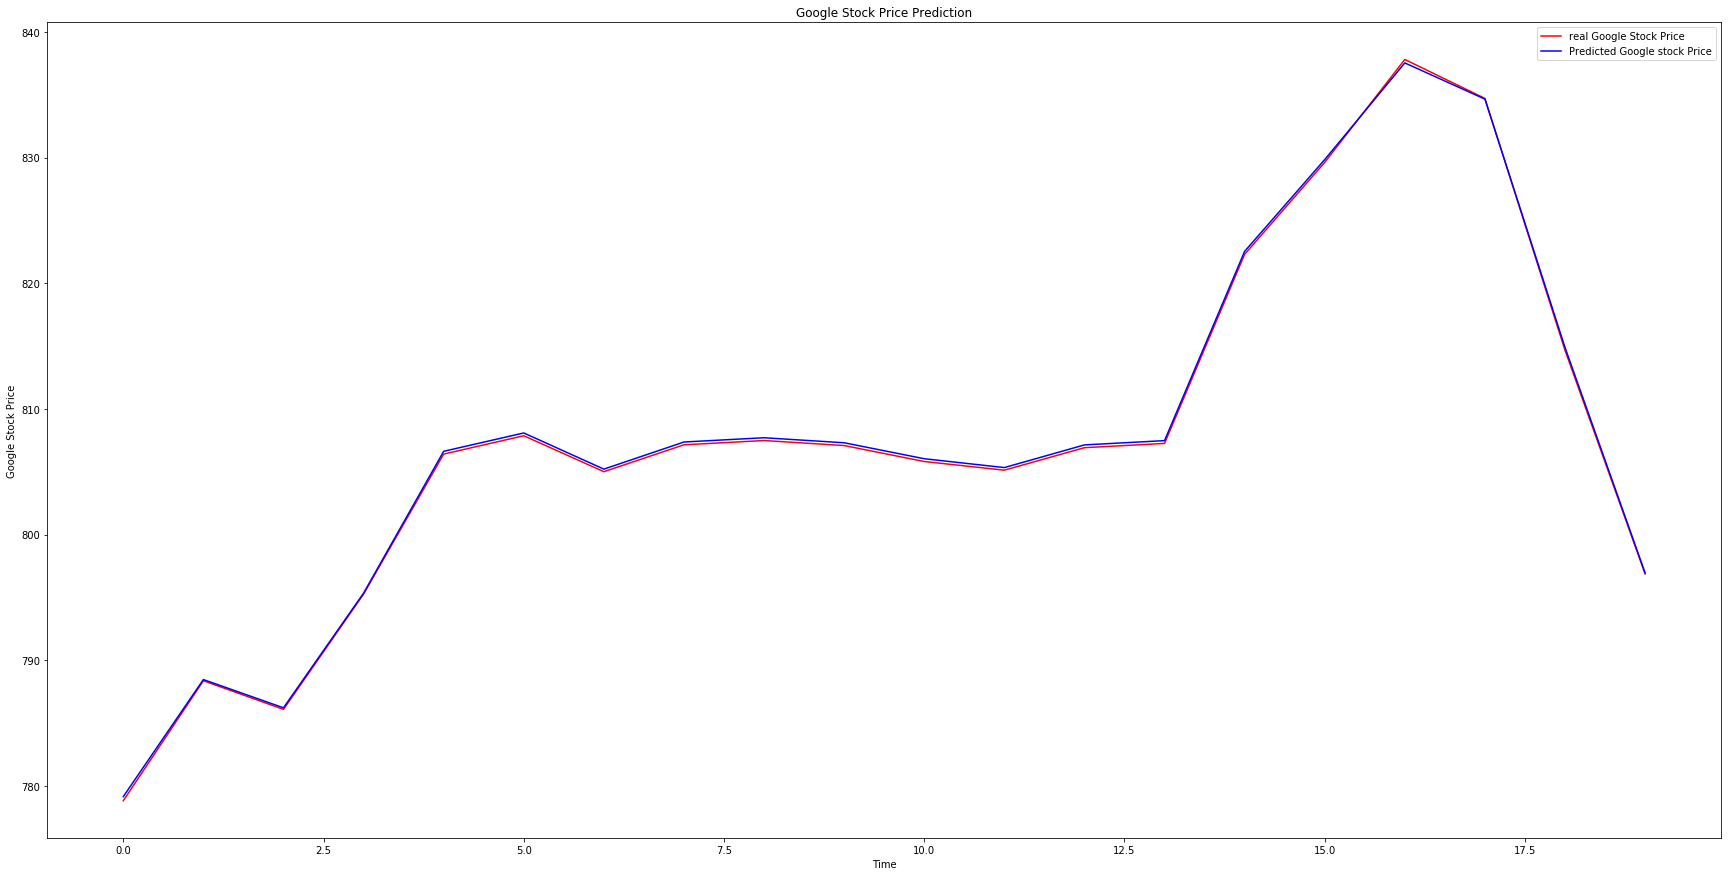

In [42]:
plt.figure(figsize=(30,15))
plt.plot(test,color='red',label='real Google Stock Price')
plt.plot(prediction,color='blue',label='Predicted Google stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [54]:
input1=sc.fit_transform(train1)
input1=np.reshape((input1),(1258,1,1,))
prediction1=regressor.predict(input1)
prediction1=sc.inverse_transform(prediction1)
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(train1,prediction1))

In [70]:
sum=0
for i in range(0,1258):
    sum=sum+train1[[0]]

In [72]:
sum/1258

array([[325.25]])

In [73]:
rmse/325.25

0.005427733182651679